#### Barometrische Höhenformel
##### Exponentiell abfallender Luftdruck als Funktion der Höhe h

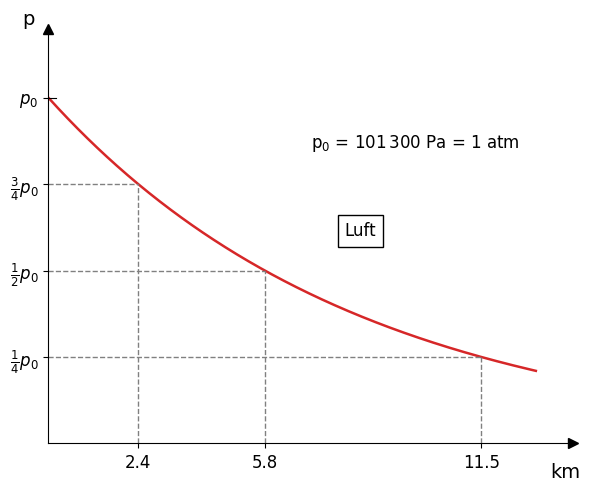

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Einstellungen
x_max = 14  # Maximale x-Achse in km
y_max = 1.2  # Maximale y-Achse (normalisierter Druck)
lw_gray = 1.0  # Linienbreite für graue Hilfslinien
# 1. Daten generieren
# Wir plotten von 0 bis 13 km
h = np.linspace(0, 13, 500)

# Normalisierter Druck (p0 = 1)
# Die Formel basiert auf der Beobachtung im Bild: 
# Bei 5.5 km ist p = 0.5 * p0. Das bedeutet p(h) = p0 * (0.5)^(h/5.5)

g = 9.81  # Erdbeschleunigung in m/s^2
rho0 = 1.24  # Dichte der Luft auf Meereshöhe in kg/m^3
p0 = 101300  # Luftdruck auf Meereshöhe in Pa
H = p0/(rho0*g) / 1000  # Skalenhöhe in km

# Normalisierter Druck
p_norm = 1.0 * np.exp(-h / H)

h_0p75 = H * np.log(4/3)  # Höhe für p = 0.75 * p0
h_0p5 = H * np.log(2)  # Höhe für p = 0.5 * p0
h_0p25 = H * np.log(4)  # Höhe für p = 0.25 * p0
p_norm_0p75 = 0.75
p_norm_0p5 = 0.5
p_norm_0p25 = 0.25

# 2. Plot einrichten
fig, ax = plt.subplots(figsize=(6, 5))

# Rote Kurve plotten
ax.plot(h, p_norm, color='#d62728', linewidth=1.8)

# 3. Hilfslinien (gestrichelt)
# Set für 5.77 km (1/2 p0)
ax.hlines(y=p_norm_0p5, xmin=0, xmax=h_0p5, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p5, ymin=0, ymax=p_norm_0p5, colors='gray', linestyles='--', linewidth=lw_gray)
# Set für 11.54 km (1/4 p0)
ax.hlines(y=p_norm_0p25, xmin=0, xmax=h_0p25, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p25, ymin=0, ymax=p_norm_0p25, colors='gray', linestyles='--', linewidth=lw_gray)
# Set für 3.15 km (3/4 p0)
ax.hlines(y=p_norm_0p75, xmin=0, xmax=h_0p75, colors='gray', linestyles='--', linewidth=lw_gray)
ax.vlines(x=h_0p75, ymin=0, ymax=p_norm_0p75, colors='gray', linestyles='--', linewidth=lw_gray)

# 4. Achsen formatieren (Spines anpassen für Pfeil-Optik)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Achsen-Limits setzen
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# Pfeilspitzen an die Achsenenden fügen
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=7)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=7)

# 5. Beschriftungen (Ticks und Labels)

# X-Achse
ax.set_xticks([h_0p75, h_0p5, h_0p25])
ax.set_xticklabels([str(round(h_0p75, 1)), str(round(h_0p5, 1)), str(round(h_0p25, 1))], fontsize=12)
ax.text(14.2, -0.1, 'km', fontsize=14, ha='right') # Einheit km

# Y-Achse
ax.set_yticks([1.0, 0.75, 0.5, 0.25])
ax.set_yticklabels(['$p_0$', r'$\frac{3}{4} p_0$', r'$\frac{1}{2} p_0$', r'$\frac{1}{4} p_0$'], fontsize=12)
ax.text(-0.7, 1.2, 'p', fontsize=14, va='bottom') # Label p

# Kleiner Strich oben bei p0 (da die Achse weitergeht, aber der Wert dort ist)
ax.plot([0, 0.2], [1, 1], color='black', linewidth=0.8) 

# 6. Text-Annotationen

# Text: p0 = 1013 hPa...
text_str = r"p$_0$ = $101\,300$ Pa = 1 atm"
ax.text(7, 0.9, text_str, fontsize=12, va='top')

# Box mit "Luft"
ax.text(7.9, 0.6, "Luft", fontsize=12, 
        bbox=dict(facecolor='white', edgecolor='black', pad=5))

# Titel oder Layout-Anpassung
plt.tight_layout()

# Anzeigen
# plt.show()

# bbox_inches='tight' schneidet überschüssigen weißen Rand weg
output_folder = 'C:/Users/alexsc31/Documents_privat/FH Campus/Clinical_Engineering/GithubRepo/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Waermelehre/'
plt.savefig(output_folder + 'hoehenformel.pdf', bbox_inches='tight')

#### 3D Particles in a box
##### Explanation

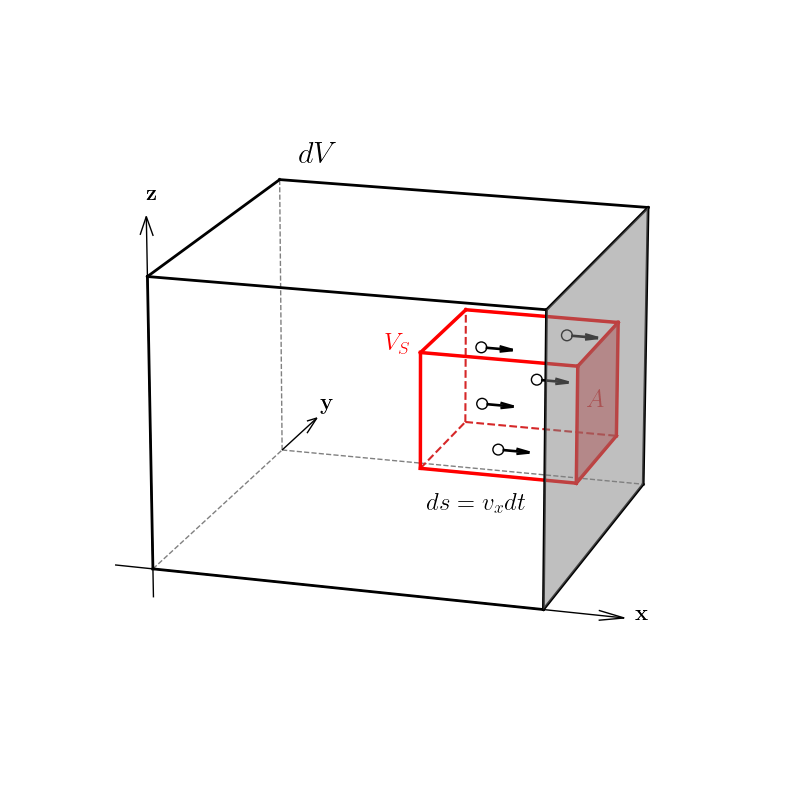

In [5]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

%matplotlib inline
# %matplotlib qt5

def draw_box_wireframe(ax, p0, p1, color_dashed='k', ls_dashed='-', lw_dashed=1, zorder_dashed=0,
                       color_thick='black', ls_thick='-', lw_thick=2, zorder_thick=1):
    """
    Hilfsfunktion zum Zeichnen eines Drahtgitter-Quaders.
    p0: Tupel (x,y,z) der unteren linken vorderen Ecke
    p1: Tupel (x,y,z) der oberen rechten hinteren Ecke
    """
    x0, y0, z0 = p0
    x1, y1, z1 = p1
    
    # Die 12 Kanten des Quaders definieren
    edges = [
        [[x0, y0, z0], [x1, y0, z0]], [[x0, y1, z0], [x1, y1, z0]],
        [[x0, y0, z1], [x1, y0, z1]], [[x0, y1, z1], [x1, y1, z1]], # parallele x-Kanten
        [[x0, y0, z0], [x0, y1, z0]], [[x1, y0, z0], [x1, y1, z0]],
        [[x0, y0, z1], [x0, y1, z1]], [[x1, y0, z1], [x1, y1, z1]], # parallele y-Kanten
        [[x0, y0, z0], [x0, y0, z1]], [[x1, y0, z0], [x1, y0, z1]],
        [[x0, y1, z0], [x0, y1, z1]], [[x1, y1, z0], [x1, y1, z1]]  # parallele z-Kanten
    ]
    
    for edge in edges:
        ax.plot3D(*zip(*edge), color=color_dashed, linestyle=ls_dashed, linewidth=lw_dashed, zorder=zorder_dashed)

    # Wir zeichnen die vorderen Linien nochmal durchgezogen für den 3D Effekt im Originalbild
    ax.plot([x0, x1], [y0, y0], [z0, z0], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z0) to (x1,y0,z0)
    ax.plot([x0, x0], [y0, y0], [z0, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z0) to (x0,y0,z1)
    ax.plot([x1, x1], [y0, y1], [z0, z0], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y0,z0) to (x1,y1,z0)
    ax.plot([x1, x1], [y0, y0], [z0, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y0,z0) to (x1,y0,z1)
    ax.plot([x0, x1], [y0, y0], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z1) to (x1,y0,z1)
    ax.plot([x1, x1], [y1, y1], [z0, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y1,z0) to (x1,y1,z1)
    ax.plot([x0, x0], [y0, y1], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y0,z1) to (x0,y1,z1)
    ax.plot([x1, x1], [y0, y1], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x1,y0,z1) to (x1,y1,z1)
    ax.plot([x0, x1], [y1, y1], [z1, z1], color=color_thick, linestyle=ls_thick, linewidth=lw_thick, zorder=zorder_thick) # (x0,y1,z1) to (x1,y1,z1)

# --- --------------------- ---
# --- Hauptprogramm ---
fig = plt.figure(num=34, figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

lw_black_cube = 2.0  # Linienbreite für die schwarze Box

# 1. Definition der Dimensionen
# Großes Volumen dV (schwarz)
L = 10
dV_start = (0, 0, 0)
dV_end = (L, L, L)

# Kleines Volumen Vs (rot)
# Wir platzieren es mittig. ds entspricht der Länge in x-Richtung.
len_Vs = 4
x_start_s, x_end_s = L-len_Vs, L
y_start_s, y_end_s = 3, 3+len_Vs
z_start_s, z_end_s = 3, 3+len_Vs
Vs_start = (x_start_s, y_start_s, z_start_s)
Vs_end = (x_end_s, y_end_s, z_end_s)

# 2. Zeichnen der Drahtgitter-Boxen
# Großes dV (schwarz, dünn, leicht transparent für die hinteren Linien)
draw_box_wireframe(ax, dV_start, dV_end, 
                   color_dashed='gray', ls_dashed='--', lw_dashed=1, zorder_dashed=0,
                   color_thick='black', ls_thick='-', lw_thick=lw_black_cube, zorder_thick=5)

# Kleines Vs (rot, durchgezogen)
draw_box_wireframe(ax, Vs_start, Vs_end, 
                   color_dashed='tab:red', ls_dashed='--', lw_dashed=1.5, zorder_dashed=1,
                   color_thick='red', ls_thick='-', lw_thick=2.5, zorder_thick=4)

# Die recht Wand der Box dV soll bemalt werden 
verts_V_rechts = [
    [L, 0, 0],
    [L, L, 0],
    [L, L, L],
    [L, 0, L]
]

# 3. Fläche A füllen (die rechte Seite der roten Box)
# Eckpunkte der Fläche A definieren
verts_A = [
    [x_end_s, y_start_s, z_start_s],
    [x_end_s, y_end_s, z_start_s],
    [x_end_s, y_end_s, z_end_s],
    [x_end_s, y_start_s, z_end_s]
]
# Polygon erstellen und hinzufügen
face_A = Poly3DCollection([verts_A], alpha=0.5, facecolor='tab:red')
ax.add_collection3d(face_A)
face_V_rechts = Poly3DCollection([verts_V_rechts], alpha=0.5, facecolor='gray')
ax.add_collection3d(face_V_rechts)
# 4. Teilchen und Geschwindigkeitsvektoren
# Manuelle Auswahl von 4 repräsentativen Punkten innerhalb von Vs
ds = 0.11  # kleiner Versatz, damit die Pfeile am Rande der Teilchen liegen
particles_pos = np.array([
    [x_start_s + 1.3, y_start_s + 1, z_start_s + 2],
    [x_start_s + 2.7, y_end_s - 3, z_start_s + 3],
    [x_start_s + 2.8, y_start_s + 3.5, z_end_s - 0.4],
    [x_start_s + 1.5, y_end_s - 2.2, z_start_s + 0.1 ],
    [x_start_s + 1.1, y_start_s + 1.6, z_end_s - 0.3 ]
])

# Vektoren (zeigen alle in positive x-Richtung)
U = np.ones(len(particles_pos)) * 2 # Länge der Pfeile
V = np.zeros(len(particles_pos))
W = np.zeros(len(particles_pos))

# Teilchen als Kreise zeichnen
ax.scatter(particles_pos[:, 0], particles_pos[:, 1], particles_pos[:, 2], 
           color='white', edgecolor='black', alpha=1.0, s=60, zorder=2)

# Pfeile zeichnen (quiver)
ax.quiver(particles_pos[:, 0]+ds, particles_pos[:, 1], particles_pos[:, 2], 
          U, V, W, color='black', length=0.35, arrow_length_ratio=0.5, lw=1.9, zorder=0)


# 5. Achsen und Beschriftungen
# Wir verstecken die Standard-Achsen und zeichnen eigene
ax.set_axis_off()

# Achsenpfeile manuell zeichnen (Startpunkt leicht außerhalb des Ursprungs)
dax = 3
ax_len = L + dax
ax.quiver(-1, 0, 0, ax_len, 0, 0, color='k', arrow_length_ratio=0.05, lw=1) # x
ax.quiver(0, L, 0, 0, dax, 0, color='k', arrow_length_ratio=0.30, lw=1) # y
ax.quiver(0, 0, -1, 0, 0, ax_len, color='k', arrow_length_ratio=0.05, lw=1) # z

# Achsenbeschriftungen
fs_ax = 16
ax.text(L+2.6, 0, 0, r'$\mathbf{x}$', fontsize=fs_ax, ha='right')
ax.text(0, L+3.3, 0, r'$\mathbf{y}$', fontsize=fs_ax, va='bottom')
ax.text(0, 0, L+2.4, r'$\mathbf{z}$', fontsize=fs_ax, va='bottom')

# Diagramm-Beschriftungen
ax.text(1, L, L+0.7, '$dV$', fontsize=22, ha='center', style='italic')
ax.text(x_start_s-0.6, y_start_s, z_end_s, '$V_S$', fontsize=18, color='red', ha='center', style='italic')
ax.text(x_end_s-0.3, y_start_s + (y_end_s-y_start_s)/2, z_start_s + (z_end_s-z_start_s)/2, '$A$', 
        fontsize=18, ha='left', va='center', color='tab:red')

# Beschriftung für ds = vx * dt als 2D-Overlay mit Rotation
ax.text(x_start_s + (x_end_s-x_start_s)/2, y_start_s-2, z_start_s-0.3, '$ds = v_x dt$', 
        fontsize=18, ha='center')


# 6. Ansichtseinstellungen
# Limits setzen, damit alles zentriert ist
ax_lim = 1
ax.set_xlim(-ax_lim, L+ax_lim)
ax.set_ylim(-ax_lim, L+ax_lim)
ax.set_zlim(-ax_lim, L+ax_lim)

# Kamerawinkel einstellen, um der Vorlage zu entsprechen
ax.view_init(elev=17, azim=-73)

plt.tight_layout()
# plt.show()

output_folder = 'C:/Users/alexsc31/Documents_privat/FH Campus/Clinical_Engineering/GithubRepo/Skriptum_Grundlagen_Physik_FH-Campus/Bilder/Kapitel_Waermelehre/'
plt.savefig(output_folder + 'particles_in_box.pdf', bbox_inches='tight')
